In [21]:
import numpy as np
import matplotlib.pyplot as plt




In [22]:
'''
cleandata=np.random.normal(0,0.1,1000)
noisedata=np.random.uniform(0,0.1,1000)
mixdata=cleandata+noisedata

noisemean=np.mean(noisedata)
noisestd=np.std(noisedata)

#plt.figure()
#plt.plot(b,'b-o')

cleancount, cleanbins, cleanignored=plt.hist(cleandata,25,normed=True)
plt.plot(cleanbins,1/(np.sqrt(2*np.pi*std**2))*
         np.exp(-(cleanbins - mean)**2/(2 * std**2)),
       linewidth=2,color='r')

plt.figure()
mixcount, mixbins, mixignored=plt.hist(mixdata,25,normed=True,color='g')
plt.plot(mixbins,1/(np.sqrt(2*np.pi*std**2))*
         np.exp(-(mixbins - mean)**2/(2 * std**2)),
       linewidth=2,color='r')

'''

"\ncleandata=np.random.normal(0,0.1,1000)\nnoisedata=np.random.uniform(0,0.1,1000)\nmixdata=cleandata+noisedata\n\nnoisemean=np.mean(noisedata)\nnoisestd=np.std(noisedata)\n\n#plt.figure()\n#plt.plot(b,'b-o')\n\ncleancount, cleanbins, cleanignored=plt.hist(cleandata,25,normed=True)\nplt.plot(cleanbins,1/(np.sqrt(2*np.pi*std**2))*\n         np.exp(-(cleanbins - mean)**2/(2 * std**2)),\n       linewidth=2,color='r')\n\nplt.figure()\nmixcount, mixbins, mixignored=plt.hist(mixdata,25,normed=True,color='g')\nplt.plot(mixbins,1/(np.sqrt(2*np.pi*std**2))*\n         np.exp(-(mixbins - mean)**2/(2 * std**2)),\n       linewidth=2,color='r')\n\n"

In [23]:
import numpy as np
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


from simdata import get_mldata



######################################
# Getting data from data sources
######################################

#=========================
#get data from csv files
#=========================

mixdata_sim_filedir='../resources/gamedata/mixdata_sim.csv'
inerdata_sim_filedir='../resources/gamedata/interdata_sim.csv'
biodata_sim_filedir='../resources/gamedata/biodata_sim.csv'

mixdata_sim=get_mldata(mixdata_sim_filedir)
interdata_sim=get_mldata(inerdata_sim_filedir)
biodata_sim=get_mldata(biodata_sim_filedir)


mixdata_labels=[]
mixdata_features=[]
for i in mixdata_sim:
    mixdata_labels=mixdata_labels+[i[14]]
    mixdata_features=mixdata_features+[i[0:14]]


In [24]:
############################################
# Clustering based on interdata
############################################

#===========================
# get data for clustering
#===========================

features_km=[]

for i in mixdata_sim:
    features_km=features_km+[i[0:4]]

features_km_np=np.array(features_km)

features_km_np = (features_km_np - features_km_np.mean(axis=0)) / features_km_np.std(axis=0)

#=================================
# cluster interdata by kmeans
#=================================

clu_km=KMeans(n_clusters=2,random_state=0).fit(features_km_np)

#labels_pre_km=kmeans.predict(features_interdata_sim[400:579])
#testlabels_true=label_interdata_sim[400:579]
#metrics.adjusted_rand_score(testlabels_true,testlabels_pre_km)

#============================
#labels for biodata
#============================
labels_pre_km=clu_km.labels_

labels_pre_km_centers=clu_km.cluster_centers_

#######################################
# Classify samples
#######################################

#================================
# data for classifying analysis
#================================
labels_svm=[]

for i in labels_pre_km:
    if i==0:
        #labels_svm=labels_svm+[labels_pre_km_centers[0]]
        labels_svm=labels_svm+[[0.]]
    else:
        #labels_svm=labels_svm+[labels_pre_km_centers[1]]
        labels_svm=labels_svm+[[1.]]

labels_svm_np = np.array(labels_svm)

features_svm=[]
for i in mixdata_sim:
    features_svm=features_svm+[i[4:14]]

features_svm_np = np.array(features_svm)
features_svm_np = (features_svm_np - features_svm_np.mean(axis=0)) / features_svm_np.std(axis=0)# follow natural distribution


train_features, test_features, train_labels, test_labels = train_test_split(features_svm_np, labels_svm_np, test_size=0.33)



#============================
#classify biodata by SVM
#============================

clf_svm=svm.SVC(C=1)
clf_svm.fit(train_features,train_labels)
labels_pre_svm=clf_svm.predict(test_features)


#============================
# Evaluation
#============================

acc_svm=accuracy_score(test_labels,labels_pre_svm)
print("acc_svm:",acc_svm)

#=================
# analysis
#=================
biolabels=[]
interlabels=[]
for i in range(len(biodata_sim)):
    biolabels=biolabels+[biodata_sim[i][10]]
biolabels_np=np.array(biolabels)

cluster_labels=[]
for i in range(len(labels_pre_km)):
    if labels_pre_km[i]==1:
        cluster_labels=cluster_labels+[0]
    else:
        cluster_labels = cluster_labels + [1]

acc_clu_bio=accuracy_score(biolabels,cluster_labels)
print("acc_clu_bio:",acc_clu_bio)




acc_svm: 0.71875
acc_clu_bio: 1.0


/Users/cancui/anaconda3/envs/abiba_analysis_v2/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
#create noise
#number of samples
n=100 
#ratio of noise,number of noise=n*alpha
alpha=0.5
#raw sample
raw_data=np.arange(0,n)

raw_feature=np.array([])

for i in raw_data:
    if i%2==0:
        raw_feature=np.append(raw_feature,0)
    else:
        raw_feature=np.append(raw_feature,1)
        





[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
[ 0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.
  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.
  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.
  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.
  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.
  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.]


输入一个整数：d
输入的不是整数！
输入一个整数：1
奇数


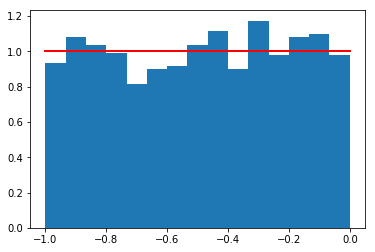

In [51]:
import matplotlib.pyplot as plt
s = np.random.uniform(-1,0,1000)
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

0